# Praktikum 1: Data Preprocessing - California Housing Datasets. 

Um sicherzustellen, dass alle notwendigen Python-Dependencies zur Verfügung stehen, arbeiten wir in diesem Praktikum in einem Docker Container. 

**Vorgehen:**
- Laden Sie das Jupyter Notebook von Moodle in einen ML1-Praktikums-Ordner in Ihrem User-Ordner. 
- Geben Sie im Terminal ein: "docker_start_ml1_gpu". Dadurch wird ein Skript aufgerufen, das einen Docker-Container für Sie baut. Das Terminal bleibt offen, wechselt nun allerdings in einen Terminal des Docker-Containers.
- Öffnen Sie den angegebenen localhost:8888-Link mit Token im Browser. Ein Jupyter Notebook sollte sich öffnen. Unter dem Ordner "host" finden Sie Ihr Homedirectory und auch das Jupyter-Notebook für das Praktikum. 
- Zum Ende des Praktikums speichern Sie Ihre Fortschritte, und beenden dann den Docker Container mit der Eingabe von "exit" im Terminal. 


**Regeln für das Praktikum:**
- Sie können die Aufgaben alleine oder zu zweit bearbeiten.
- Sie dürfen in Vorlesungs-Skripten nachlesen
- Sollten Fragen auftauchen, oder die Verwendung von Klassen unklar sein, schlagen Sie  die Dokumentation online nach
- Befolgen Sie einfach den Anweisungen im Skript; manchmal wird im Markdown Text eine Frage gestellt; tragen Sie Ihre Antwort in der nächsten Markdown-Zelle bei #TODO ein!

**Hinweis:**
Wir verwenden zum Aufbereiten des Datensets die [pandas API](https://pandas.pydata.org/docs/reference/)
Zum Visualisieren von Daten können Sie Matplotlib oder Seaborne verwenden, die Sie bereits aus Data Science kennen, oder pandas-Funktionen.
Zum Trainieren von Modellen verwenden wir in dieser Vorlesung die [Scikit Learn API](https://scikit-learn.org/stable/)


Wir haben in der Vorlesung das **California Housing Dataset** besprochen: Es enthält die mittleren Preise für Häuser in Bezirken von Californien zusammen mit den geografischen Daten wie Längen- und Breitengrad und Nähe zum Meer, Zensus-Daten wie den Einwohnerzahlen in jedem Bezirk, der Gesamtanzahl von Räumen und Haushalten, sowie dem mittleren Einkommen in den Bezirken. 

**Ziel: Wir wollen mit Hilfe dieser Daten herausfinden, wie man den mittleren Hauspreis von den anderen gegebenen Daten ableiten kann.**

### 1. Schritt: Datenvisualisierungen

Der erste Schritt wenn man mit Daten arbeitet ist, diese so gut wie möglich kennen zu lernen und zu visualisieren. 

Führen Sie die vorbefüllten Zellen aus, welche die Daten von "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz" in einen Unterordner "housing" von "datasets" im ML1-Prakikumsordner speichern, in dem sich auch dieses Notebook befindet. Dann werden die Daten geladen. 

In [477]:
# Import der notwendigen Dependencies
import os
# zum Entpacken von Dateien:
import tarfile
# zum Herunterladen von Dateien:
import urllib.request
# zum Bearbeiten von "DataFrames"
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
HOUSING_PATH = os.path.join("datasets", "housing")

# Funktion zum Herunterladen der Daten
"""Optional Arguments: housing_url=HOUSING_URL, housing_path=HOUSING_PATH"""

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [478]:
fetch_housing_data()

/var/folders/wk/lvhvm_2j0qz86pj3f3dl9t9w0000gn/T/ipykernel_62356/2033938807.py:25: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [479]:
# Funktion zum Lade der Daten
"""Optional Argument: housing_path=HOUSING_PATH"""

def load_housing_data(housing_path=HOUSING_PATH): 
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

Holen Sie sich Informationen über den Datensatz "housing", indem Sie die Anweisungen der Kommentare unten befolgen: 

In [480]:
# Sehen Sie sich die ersten Zeilen der Tabelle mit .head() an.
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Was ist ein Instance des Datensatzes?

Ein Bezirk in Californien

In [481]:
# Holen Sie sich die grundlegenden Infos über die Daten mit .info()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Was sind die Features und das Label der Daten? Notieren Sie diese: 

**A:**
Features: longitude, latitude, housing median age, total rooms, total bedrooms, population, housholds, median income, median house value, ocean proximity

Label: median house price

Welche Features sind nicht numerisch? Sind diese ordinal oder nominal?

ocean proximity ist nicht numerisch, es ist ordinal da es die nähe zum meer angibt in "NEAR BY", "INLAND" etc.

In [482]:
# Lassen Sie sich die wichtigsten statistischen Daten zu den einzelnen Features ausgeben
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Werfen Sie einen Blick auf den Mittelwert von total_rooms und total_bedrooms. Kann es sich hierbei um die Anzahl von Räumen je Haus handeln? Was beschreiben die Werte wohl? 

**A**: Total rooms beschreibt die gesamten Räume in den Häusern in einem Bezirk und total bedroom gibt die gesamten Schalfzimmer in den häusern des bezirks an, der wert total bedrooms ist also in total rooms enthalten


Nun geht es an die Visualisierungen in Form von Histogrammen, also die Unterteilung der Daten in diskrete Klassen und Anzeige der Häufigkeit jeder Klasse. Lassen Sie Sich Histogramme aller Features ausgeben.

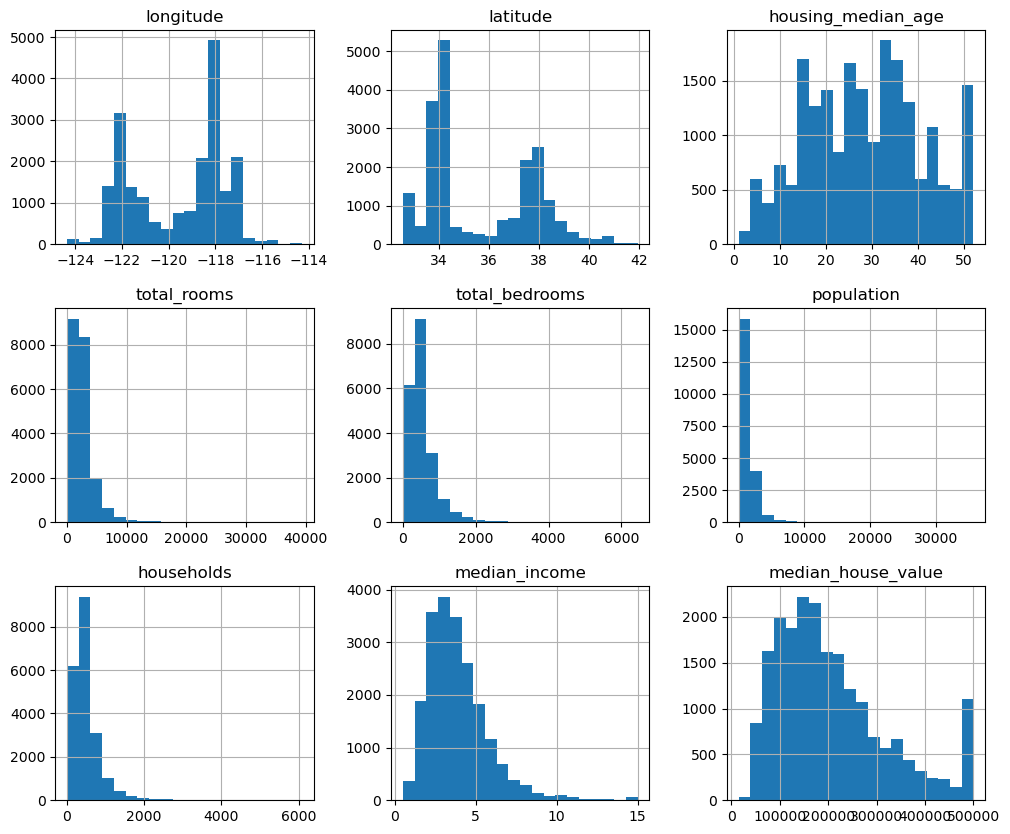

In [483]:
# Anzeige von Histogrammen der Features
housing.hist(figsize=(12,10), bins=20)
plt.show()

Lesen Sie von den Histograms ab, wo (longitude und latitude) die meisten districts sind. Googlen Sie, wo sich dieser Ort befindet.

Antwort: Los Angeles, Kalifornien

Als nächstes werten wir **Pearson's Korrelationsmatrix** aus. 
Berechnen Sie die Korrelationsmatrix in der ersten Zelle und lassen Sie sie ausgeben.

In [484]:
# Berechnen der Korrelationsmatrix
housing_numeric = housing.drop('ocean_proximity', axis=1)
housing_corr = housing_numeric.corr('pearson')
housing_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Visualisieren Sie die Absolutbeträge der Korrelationsmatrix mit .matshow() in der nächsten Zelle.

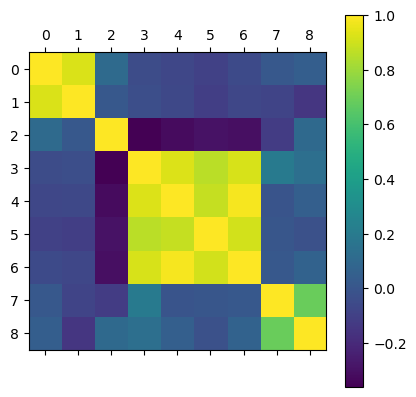

In [485]:
# Visualisierung der Korrelationsmatrix
# Berechnen der Korrelationsmatrix
corr_matrix = housing_numeric.abs().corr()

# Visualisierung der Korrelationsmatrix
plt.matshow(corr_matrix)
plt.colorbar()
plt.show()

Welche Spalte der Korrelationsmatrix ist die wichtige für unser Ziel, median_house_value zu prognostizieren? 

Spalte 4 total rooms, da dort die Korrelation am höchsten  ist.

Lassen Sie sich diese separat mit absteigenden Werten ausgeben in der nächsten Zelle.

In [486]:
# Sortieren der Spalte 'total_rooms' in absteigender Reihenfolge und Ausgabe
housing_corr['total_rooms'].abs().sort_values(ascending=False)


total_rooms           1.000000
total_bedrooms        0.930380
households            0.918484
population            0.857126
housing_median_age    0.361262
median_income         0.198050
median_house_value    0.134153
longitude             0.044568
latitude              0.036100
Name: total_rooms, dtype: float64

In [487]:
housing_corr['median_house_value'].abs().sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

Welches Feature ist dasjenige, das am meisten mit median_house_value korreliert ist? 

Was ist das am wenigsten korrelierte Feature? Was bedeutet dies? Und was bedeutet es nicht?

1. median_income weißt die größte Korrelation mit median_hous_value auf
2. population korreliert am wenigsten mit median_hous_value
3. Dass heißt desto höher das einkommen einer Person, desto höher der Wert des Hauses
4. dass jeder der viel geld verdient auch ein teures Haus hat und umgekehrt

Visualisieren Sie die Abhängigkeit von median_house_value und diesem wichtigsten Feature in einem Scatterplot in der nächsten Zelle.

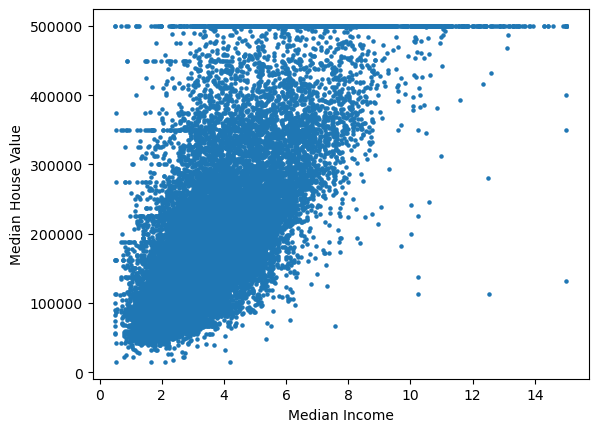

In [488]:
plt.scatter(housing['median_income'], housing['median_house_value'], s=5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

##### Was fällt auf und wie erklären Sie sich das? 
Das bei den sehr teuren häusern die Verteilung sehr stark ist. Vielleicht liegt das daran das viele Häuser vererbt bekommen.

### 2. Schritt: Adding additional features

Nachdem wir ein gutes Gefühl dafür haben, wie die Daten aussehen und welche Features relevant sind, nutzen wir dieses Wissen, um potentiell wichtige zusätzliche Features aus den bisher vorhandenen abzuleiten.  

Das Datenset beinhaltet zum Beispiel die Features: 
- total_rooms: die Gesamtzahl von Räumen im District
- total_bedrooms: die Gesamtzahl von Schlafzimmern im District
- Population: die Anzahl von Einwohnern im District
- Households: die Ahzahl von Haushalten im District

Gestalten Sie aus diesen Features sinnvolle(re) neue Features, welche einen Einfluss auf den mittleren Preis eines Hauses haben könnten:

In [489]:
# Erstellen neuer Features
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

# Anzeigen der ersten Zeilen, um die neuen Features zu überprüfen
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


Berechnen Sie in der nächsten Zelle erneut die Korrelationmatrix und lassen sich die wichtigste Spalte nach Größe absteigend sortiert ausgeben. 

In [490]:
housing_numeric_new = housing.drop('ocean_proximity', axis=1)
housing_corr_new = housing_numeric_new.corr('pearson')
corr_matrix_new = housing_corr_new.abs()
housing_corr_new.abs()
#plt.matshow(corr_matrix_new)
#plt.colorbar()
#plt.show()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,0.924664,0.108197,0.044568,0.069608,0.099773,0.055310,0.015176,0.045967,0.027540,0.092657,0.002476
latitude,0.924664,1.000000,0.011173,0.036100,0.066983,0.108785,0.071035,0.079809,0.144160,0.106389,0.113815,0.002366
housing_median_age,0.108197,0.011173,1.000000,0.361262,0.320451,0.296244,0.302916,0.119034,0.105623,0.153277,0.136089,0.013191
total_rooms,0.044568,0.036100,0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,0.187900,0.024581
total_bedrooms,0.069608,0.066983,0.320451,0.930380,1.000000,0.877747,0.979728,0.007723,0.049686,0.001538,0.084238,0.028355
population,0.099773,0.108785,0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,0.024650,0.072213,0.035319,0.069863
households,0.055310,0.071035,0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,0.080598,0.065087,0.027309
median_income,0.015176,0.079809,0.119034,0.198050,0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,0.615661,0.018766
median_house_value,0.045967,0.144160,0.105623,0.134153,0.049686,0.024650,0.065843,0.688075,1.000000,0.151948,0.255880,0.023737
rooms_per_household,0.027540,0.106389,0.153277,0.133798,0.001538,0.072213,0.080598,0.326895,0.151948,1.000000,0.416952,0.004852


### 3. Schritt: Preparing the data for ML: Train-Test Split und Input-Label Split

Der dritte Schritt ist es, die Daten in Training Set und Test Set zu unterteilen. 

Hinweis: Dies müssen wir tun, BEVOR wir die Daten bereinigen. 

Grund: Wir wollen die Daten im Test set verwenden, um die Leistung des Algorithmus unvoreingenommen bewerten zu können (das heißt, dass der Algorithmus beim Trainieren keine Infos aus dem Test set gesehen haben darf). Aber beim Bereinigen der Daten werden oft Mittelwerte aus dem ganzen Datenset verwendet, um fehlende Daten zu ersetzen. Wenn dieser Mittelwert incl. der Testdaten berechnet wird, ist der Algorithmus schon voreingenommen bzgl. der Test Daten. Dies wäre ein Fall von **Data Leakage**.

Nachdem wir separate Trainings und Test Sets haben, unterteilen wir diese in Input-Daten und Labels, weil ML Algorithmen diese als separaten Input brauchen.

##### Train-Test-Split ohne Scikit-Learn

Um zu illustrieren, was bei diesem Split passiert, schreiben Sie eine Funktion "split_train_test", die "housing" in zwei DataFrames unterteilt. 
Argumente der Funktion: 
- ein DataFrame, der zu unterteilen ist
- eine Zahl zwischen 0 und 1 (oft: 0.2), die angibt, welcher Bruchteil der Daten in das Test Set soll. 
Output der Funktion: 
Zwei DataFrames: training set und test set

Hierbei ist wichtig, dass die housing daten vor dem Split zufällig durchpermutiert werden (verwenden Sie np.random.permutation auf die Zeilennummern), um irgendwelche "Sortierungen" in den Daten zu vermeiden.

Um die Ergebnisse des zufälligen Durchpermutierens reproduzierbar zu machen für jeden Durchlauf in diesem Praktikum, setzen Sie zuvor np.random.seed(42).

In [491]:
# Schreiben Sie Ihre Funktion split_train_test hier:
import numpy as np
np.random.seed(42)

def split_train_test(data, test_ratio):
   data_permutet = data.iloc[np.random.permutation(data.index)].reset_index(drop=True)

   train_size = int((1-test_ratio) * len(data_permutet))

   train_set = pd.DataFrame(data_permutet.iloc[:train_size])
   test_set = pd.DataFrame(data_permutet.iloc[train_size:])

   return train_set, test_set


In [492]:
# Nutzen Sie die Funktion, um die Daten 80-20 in "train_set" und "test_set" aufzuteilen
split_train_test(housing, 0.2)

# Lassen Sie sich die Länge der DataFrames ausgeben. Überprüfen Sie die Aufteilung 80-20



(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0        -119.01     36.06                25.0       1505.0             NaN   
 1        -119.46     35.14                30.0       2943.0             NaN   
 2        -122.44     37.80                52.0       3830.0             NaN   
 3        -118.72     34.28                17.0       3051.0             NaN   
 4        -121.93     36.62                34.0       2351.0             NaN   
 ...          ...       ...                 ...          ...             ...   
 16507    -119.12     36.05                27.0       1575.0           321.0   
 16508    -116.90     33.65                15.0        652.0           149.0   
 16509    -120.71     38.34                16.0       1257.0           231.0   
 16510    -117.13     32.91                16.0       2715.0           581.0   
 16511    -117.93     33.71                10.0       2775.0           717.0   
 
        population  households  median

##### Train-Test Split mit Scikit-Learn

Nutzen Sie in der nächsten Zelle statt dessen die Scikit-Learn Methode [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), um die Daten in train_set und test_set aufzuteilen.

In [493]:
# Verwenden Sie Sklearn's train_test_split für den Split in train_set und test_set
from sklearn.model_selection import train_test_split

train_split, test_split = train_test_split(housing, test_size=0.2, random_state=42)

# Lassen Sie sich die ersten Zeilen von test_set ausgeben. 

train_split.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421,0.180940,2.300000


##### Stratified Splits

Obige Methoden unterteilen das Datenset zufällig in zwei Sets. Allerdings kann dies, wenn man Pech hat, zu einem sogenannten **Data mismatch** bzw. **nonrepresentative Training Data** führen. 

Was dies ist, lässt sich an einem einfachen Beispiel erklären: Angenommen, wir klassifizieren die MNIST-Bilder von handgeschriebenen Zahlen, und der Split unterteilt die Daten so, dass alle Bilder von Zahlen von 0-7 im Training Set und alle Bilder von 8 oder 9 im Test Set sind. Dann lernt der Algorithmus nur, die Zahlen 0-7 zu erkennen, und ist bei den Test-Bilder von 8 und 9 völlig aufgeschmissen! 

In unserem Beispiel könnte so etwas auch passiert sein: Angenommen, es sind zufällig alle Daten im Trainings-Set gelandet, die von "reichen" Districts kommen, mit hohem median_income - während alle ärmeren Districts im Test-Set landen. 
Dann wird das trainierte Modell ziemlich sicher falsche Prognosen generieren. 

Um zu sehen, ob dies bei unserem bisherigen train und test set der Fall ist, unterteilen wir das Feature median_income in fünf Einkommenskategorien und überprüfen, wie die Verteilung im train und test set ist im Vergleich zum gesamten Datenset. Führen Sie die vorbefüllten Zellen aus. 

In [494]:
# Hinzufügen einer neuen Feature-Spalte genannt "income_cat", 
# welche jede Instance (also jeden District) je nach Mittlerem Einkommen
# in eine von 5 Einkommensklassen einteilt

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [495]:
# Wie viel Prozent der Instances sind in welcher Einkommensklasse?
income_cat_percent = housing['income_cat'].value_counts(normalize=True) * 100
income_cat_percent

income_cat
3    35.058140
2    31.884690
4    17.630814
5    11.443798
1     3.982558
Name: proportion, dtype: float64

Um auf jeden Fall **Data Mismatch** zu vermeiden, kann man einen **stratifizierten Split = stratified train-test-split** ausführen. 
Hierbei wird ein kategorielles Feature ausgewählt, von dem wir sicher gehen wollten, dass die einzelnen Klassen bei dem Split gleich verteilt werden (also die gleiche Verteilung haben wie im ursprünglichen Datenset). Falls das Feature nicht kategoriell ist, kann man es wie oben in ein kategorielles Feature verwandeln. 

(Vor allem bei Klassifizierungs-Tasks wie dem MNIST Beispiel von oben ist es hilfreich, einen stratifizierten Split bzgl der labels zu machen.)

Im Folgenden lernen wir zwei Arten kennen, wie man einen stratified Split ausführen kann: 

Die einfachste: Scikit-Learn's train_test_split hat eine "stratify" Option. Hierzu verwenden Sie als Wert der stratify-Option die Spalte, bezüglich der stratifiziert werden soll. Modifizieren Sie den train_test_split Code von oben entsprechend in der nächsten Zelle und nennen Sie die entsprechenden Mengen "strat_train_set" und "strat_test_set". Alternativ können Sie auch [StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) verwenden. 

In [496]:
# modifizierter train_test_split Code mit stratify
strat_train_split, strat_test_split = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing['income_cat'])

In [497]:
# Berechnen Sie die prozentuale Verteilung der 5 Einkommensklassen für train_set 
strat_train_percent = strat_train_split['income_cat'].value_counts(normalize=True) * 100
strat_train_percent

income_cat
3    35.059351
2    31.885901
4    17.629603
5    11.446221
1     3.978924
Name: proportion, dtype: float64

Nachdem wir income_cat für den stratifizierten Split verwendet haben, brauchen wir sie nicht mehr. Löschen Sie die Spalte wieder mit pandas' [drop()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) mit der Option "inplace=True". 

In [498]:
# Löschen Sie die Spalte in allen DataFrames
housing.drop('income_cat', axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [499]:
strat_test_split.drop('income_cat', axis=1) 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,6.715625,0.156972,2.275000
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,7.137809,0.151980,3.021201
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,5.283636,0.185822,2.938182
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,5.491694,0.196612,3.561462
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,6.154723,0.162477,2.434853
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,6.108696,0.189947,3.279891
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,3.138298,0.332203,4.503546
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4.974860,0.192027,1.851955
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,5.026699,0.198938,2.623786


In [500]:
strat_train_split.drop('income_cat', axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,6.297405,0.183835,2.411178


##### Input-Label Split

Wir trennen nun sowohl für strat_train_set, als auch für strat_test_set die Labels von den Input-Daten.

Löschen Sie hierzu mit .drop (dieses Mal mit Inplace=False) die label-Spalte "median_house_value" und nennen Sie den neuen DataFrame train.
Kopieren Sie außerdem die Spalte median_house_value in einen DataFrame namens train_labels.

Führen Sie dieselben Schritte durch für strat_test_set und nennen Sie die neuen DataFrames test und test_labels.

In [501]:
test_labels = pd.DataFrame(strat_test_split['median_house_value'])
test = strat_test_split.drop(['median_house_value', 'income_cat'], axis=1, inplace=False)

train_labels = pd.DataFrame(strat_train_split['median_house_value'])
train = strat_train_split.drop(['median_house_value', 'income_cat'], axis=1, inplace=False)


In [502]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,6.297405,0.183835,2.411178


- Speichern Sie die train_labels als csv-Datei "train_labels.csv" unter dem Pfad HOUSING_PATH ab. 
- Speichern Sie die test_labels als csv-Datei "test_labels.csv" unter dem Pfad HOUSING_PATH ab!

ACHTUNG: Setzen Sie dabei immer index = False. Warum ist das wichtig, falls Sie später die Daten einlesen und zum Trainieren eines Modells verwenden wollen? 

#TODO

In [503]:
train_labels.to_csv(os.path.join(HOUSING_PATH, 'train_labels.csv'), index=False)
test_labels.to_csv(os.path.join(HOUSING_PATH, 'test_labels.csv'), index=False)


### 4. Schritt: Data Cleaning

Als nächstes bereinigen wir die Trainings Daten (und nur diese), das heißt wir kümmern uns um fehlende Werte. Es gibt zwei Möglichkeiten, mit fehlenden Daten umzugehen: wir lassen sie entweder weg, oder ersetzen sie durch geeignete Werte (z.B. Durchschnittswerte). Doch zunächst müssen wir erst mal herausfinden, welche Werte fehlen.

##### Finden von fehlenden Werten in den Daten

Finden Sie heraus, wie viele Werte in "train" in den einzelnen Features fehlen: 

In [504]:
train.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              158
population                    0
households                    0
median_income                 0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           158
population_per_household      0
dtype: int64

Wir betrachten zunächst die Instances, die Null Values enthalten: 

In [505]:
incomplete_rows = train[train.isnull().any(axis=1)]

##### Methoden, mit unvollständigen Daten umzugehen

1. **Komplettes Feature löschen**: Wenn in einer Spalte sehr viele Werte nicht befüllt sind, kann es das beste sein, einfach die Spalte zu löschen und die Instances, die hier keinen Eintrag haben, zu behalten. (gut, wenn man wenige Daten hat und ein Feature systematisch schlecht befüllt ist)
2. **Unvollständige Instances löschen**: Hiermit kann man alle Instances aus dem Datensatz löschen, in denen ein Datensatz fehlt. Über die Option subset kann man einschränken, in welcher Spalte hier nach fehlenden Werten gesucht wird. Diese Option ist besser, wenn es nur wenig Instances gibt, die schlecht sind, und nicht systematisch eine ganze Spalte schlecht ist.
3. **Nichts löschen, sondern fehlende Werte ersetzen** mit .fillna(): generell eine bevorzugte Variante, weil man keine Instances oder Features verliert. 


Wenden Sie 1. auf incomplete_rows an und sehen Sie sich das Ergebnis an. (mit dem default Inplace=False)

In [506]:
incomplete_rows.drop(['total_bedrooms', 'bedrooms_per_room'], axis=1, inplace=False)





,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY,4.707668,1.317891
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN,4.537074,3.947896
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN,5.826196,2.403023
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN,4.448980,2.840136
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN,6.835417,2.385417
...,...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,3207.0,1012.0,4.0767,INLAND,5.460474,3.168972
4691,-118.37,34.07,50.0,2519.0,1117.0,516.0,4.3667,<1H OCEAN,4.881783,2.164729
9149,-118.50,34.46,17.0,10267.0,4956.0,1483.0,5.5061,<1H OCEAN,6.923129,3.341875
16757,-122.48,37.70,33.0,4492.0,3477.0,1537.0,3.0546,NEAR OCEAN,2.922576,2.262199


Wenden Sie 2. auf incomplete_rows an und sehen Sie sich das Ergebnis an. (mit dem default Inplace=False)

In [507]:
incomplete_rows.dropna(subset=['total_bedrooms'])



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household


Wenden Sie 3. an und ersetzen die fehlenden Werte durch den Median mit fillna. 

##### Unvollständige Daten ersetzen mit Scikit Learn

Scikit Learn bietet eine bequeme Lösung, um den letzten Schritt (fehlende Werte durch irgendwelche passenden Werte ersetzen) automatisch für alle (numerischen) Spalten gleichzeitig auszuführen: [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

Legen Sie bitte zuerste eine Kopie "housing_num" des DataFrames ohne das nicht-numerische Feature "ocean_proximity" an, und wenden sie in der nächsten Zelle den SimpleImputer auf diese Kopie an mit .fit (berechnet die Zentralwerte) und .transform (ersetzt die fehlenden Daten mit den Zentralwerten). Das Ergebnis ist ein numpy ndarray. Verwandeln Sie es wieder in ein pandas Dataframe "train_num_imputed".  

In [508]:
housing_num = train.copy()


In [509]:
housing_num = housing_num.drop('ocean_proximity', axis=1)

In [510]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num_imputed = imputer.fit_transform(housing_num)

train_num_imputed = pd.DataFrame(housing_num_imputed)

In [511]:
train_num_imputed

,0,1,2,3,4,5,6,7,8,9,10
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,5.485836,0.205784,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,6.927083,0.160714,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,5.393333,0.191595,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,3.886128,0.276505,1.859213
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,6.658342,0.184696,2.023976
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,5.571932,0.179977,3.363188
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,4.110465,0.234795,2.662791
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,6.297405,0.183835,2.411178


In [512]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,6.297405,0.183835,2.411178


### 5. Schritt: Verarzten von kategoriellen Features

Ein ML Algorithmus kann keine Strings verarbeiten, deswegen müssen kategorielle Features wie "ocean_proximity" entweder in (1,2,3,...) oder in One-Hot Vektoren ((1,0,0,...), (0,1,0,0,....), (0,0,1,0,...)... statt "<$1H OCEAN"/"INLAND"/NEAR OCEAN...")verwandelt werden. 
Dafür gibt es in sklearn den
- [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)
- [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)


Was ist hier geeigneter und warum?

#TODO


Wenden Sie dies in der nächsten Zelle auf den Dataframe mit den kategoriellen Spalten (also hier nur: ocean_proximity - aber als Dataframe, nicht als Series!) an. 

In [513]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_columns = encoder.fit_transform(train[['ocean_proximity']])

encoded_column_names = encoder.get_feature_names_out(['ocean_proximity'])

encoded_df = pd.DataFrame(encoded_columns, columns=encoded_column_names, index=train.index)

train_encoded = pd.concat([train, encoded_df], axis=1).drop(columns=['ocean_proximity'])

train_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,5.485836,0.205784,3.168555,1.0,0.0,0.0,0.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,6.927083,0.160714,2.623698,0.0,0.0,0.0,1.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,5.393333,0.191595,2.223333,1.0,0.0,0.0,0.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,3.886128,0.276505,1.859213,0.0,0.0,0.0,1.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,6.096552,0.182692,3.167241,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,6.658342,0.184696,2.023976,0.0,0.0,0.0,0.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,5.571932,0.179977,3.363188,1.0,0.0,0.0,0.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,4.110465,0.234795,2.662791,0.0,0.0,0.0,0.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,6.297405,0.183835,2.411178,0.0,0.0,0.0,0.0


Wie verändert dies die Daten?

#TODO

Lassen Sie sich die Spaltenüberschriften ausgeben. 
Hinweis: benutzen Sie dafür das `.categories_` Attribut des oben benutzten Sklearn Estimators. 


In [514]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

### 6. Schritt: Feature Scaling

ML Algorithmen können in der Regel nicht gut mit unterschiedlich dimensionierten Features umgehen. Der Grund ist, dass größere Zahlen im direkten Vergleich mit sehr kleinen einfach mehr ins Gewicht fallen - das heißt, wenn ein wichtiges Feature sehr kleine Einträge hat, und ein unwichtiges s
ehr große, dann kann es sein dass der Algorithmus trotzdem dem unwichtigen Feature mehr Gewicht gibt. 

Nennen Sie zwei Möglichkeiten, die Features zu skalieren, und überlegen Sie sich, welche Vor- und Nachteile es geben könnte!

---

1. Standardisierung (Standard-Scaling):
Die Standardisierung transformiert die Daten so, dass sie einen Mittelwert von 0 und eine Standardabweichung von 1 haben.

- ***Vorteile:*** Besonders nützlich, wenn die Daten einer Normalverteilung ähneln oder für Algorithmen, die die Distanz zwischen Datenpunkten        berücksichtigen (z.B. lineare Regression, SVM, k-NN).

- ***Nachteile:*** Wenn die Daten stark schief verteilt sind, können Ausreißer die Skalierung beeinflussen, was die Standardisierung weniger effektiv macht.

---

2. Min-Max-Skalierung (Normalisierung):
Die Min-Max-Skalierung transformiert die Daten in einen festen Bereich, normalerweise [0, 1].

- ***Vorteile:*** Hilfreich für Algorithmen wie neuronale Netze, die am besten mit Daten im Bereich [0, 1] oder [-1, 1] funktionieren. Die Min-Max-Skalierung ist zudem robust gegenüber der absoluten Größe der Features.

- ***Nachteile:*** Sensitiv gegenüber Ausreißern, da der Wertebereich durch das Minimum und Maximum der Daten bestimmt wird. Ein extrem hoher oder niedriger Wert kann den gesamten Wertebereich verzerren.

---


Verwenden Sie in der nächsten Zelle den [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), um die numerischen Features train_num_imputed zu standardisieren. Er gibt ein ndarray zurück. Wandeln Sie es wieder in ein pandas DataFrame um und lassen Sie sich die ersten Zeilen ausgeben.

In [515]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_train = scaler.fit_transform(train_num_imputed)

scaled_train = pd.DataFrame(scaled_train)

scaled_train

,0,1,2,3,4,5,6,7,8,9,10
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,-0.122484,0.006223
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.911663,-0.040811
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.370939,-0.075371
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,1.115873,-0.106803
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,-0.526821,0.006109
...,...,...,...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,0.466353,-0.491732,-0.092580
16508,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,0.050362,-0.574363,0.023024
16509,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,-0.509240,0.385514,-0.037436
16510,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,0.328149,-0.506808,-0.059156


#### Verwenden einer Pipeline für das Data Processing 

Die obigen Schritte für die numerischen Spalten, also Data Cleaning und dann Standardisieren, kann man auch in einer Pipeline auf einmal machen. 

Wenden Sie dafür Scikit Learn's [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), um den SimpleImputer und den StandardScaler in einem Schritt auf die untransformierten numerischen Daten housing_num anzuwenden.

In [516]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

housing_num_pipe = pipeline.fit_transform(housing_num)

housing_num_pipe = pd.DataFrame(housing_num_pipe, columns=housing_num.columns)

housing_num_pipe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,-0.941350,1.347438,0.027564,0.584777,0.638183,0.732602,0.556286,-0.893647,0.017395,-0.124151,0.006223
1,1.171782,-1.192440,-1.722018,1.261467,0.779415,0.533612,0.721318,1.292168,0.569256,-0.913442,-0.040811
2,0.267581,-0.125972,1.220460,-0.469773,-0.547672,-0.674675,-0.524407,-0.525434,-0.018024,-0.372641,-0.075371
3,1.221738,-1.351474,-0.370069,-0.348652,-0.038752,-0.467617,-0.037297,-0.865929,-0.595140,1.114380,-0.106803
4,0.437431,-0.635818,-0.131489,0.427179,0.270495,0.374060,0.220898,0.325752,0.251241,-0.528545,0.006109
...,...,...,...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.694983,0.543471,1.341519,0.637374,0.466353,-0.493451,-0.092580
16508,-0.921368,1.342761,-1.085806,2.468471,2.160072,3.002174,2.451492,-0.557509,0.050362,-0.576094,0.023024
16509,-1.570794,1.310018,1.538566,-0.895802,-0.898315,-0.862013,-0.865118,-0.365475,-0.509240,0.383918,-0.037436
16510,-1.560803,1.249211,-1.165333,0.249005,0.109784,-0.189747,0.010616,0.168261,0.328149,-0.508530,-0.059156


Wenn wir allerdings nicht nur die numerischen, sondern die numerischen und die kategoriellen Features gleichzeitig in einer Pipeline transformieren wollen, geht das mit der [ColumnTransformer] (https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html). 

Verwenden Sie den ColumnTransformer, um die oben durchgeführten Transformationen (die numerische Pipeline für die numerischen Spalten, und OneHotEncoder für die kategorielle Spalte ocean_proximity) auf den ursprünglichen DataFrame training anzuwenden. 

Das Resultat des Transformers ist wieder ein ndarray. Verwandeln Sie es zu Übung wieder in einen DataFrame, aber Achtung: Wenn Sie das Ergebnis in einen DataFrame umwandeln, beachten Sie, dass die Spaltenüberschriften nun andere sind! Zusätzlich zu den numerischen Features gibt es nun für jede ocean_proximity-Kategorie eine Spalte!

Nennen Sie das resultierende DataFrame housing_train.

In [517]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [518]:

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Numerische und kategoriale Spalten identifizieren
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
categorical_features = ['ocean_proximity']

# Numerische Pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Fehlende Werte durch Mittelwert ersetzen
    ('scaler', StandardScaler())                  # Standardisierung der numerischen Spalten
])

# Kategoriale Pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fehlende Werte durch häufigste Kategorie ersetzen
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-Hot-Encoding
])

# ColumnTransformer definieren
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),  # Numerische Pipeline auf numerische Features anwenden
    ('cat', categorical_pipeline, categorical_features)  # Kategoriale Pipeline auf kategoriale Features anwenden
])

# Preprocessing auf den gesamten Datensatz anwenden
housing_train_transformed = preprocessor.fit_transform(train)

# In DataFrame umwandeln
# Die Spaltennamen des resultierenden DataFrames setzen
numerical_columns = numerical_features
categorical_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_columns = list(numerical_columns) + list(categorical_columns)
housing_train = pd.DataFrame(housing_train_transformed, columns=all_columns)

housing_train


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-0.941350,1.347438,0.027564,0.584777,0.638183,0.732602,0.556286,-0.893647,0.017395,-0.124151,0.006223,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.779415,0.533612,0.721318,1.292168,0.569256,-0.913442,-0.040811,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.547672,-0.674675,-0.524407,-0.525434,-0.018024,-0.372641,-0.075371,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.038752,-0.467617,-0.037297,-0.865929,-0.595140,1.114380,-0.106803,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.270495,0.374060,0.220898,0.325752,0.251241,-0.528545,0.006109,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.694983,0.543471,1.341519,0.637374,0.466353,-0.493451,-0.092580,1.0,0.0,0.0,0.0,0.0
16508,-0.921368,1.342761,-1.085806,2.468471,2.160072,3.002174,2.451492,-0.557509,0.050362,-0.576094,0.023024,0.0,1.0,0.0,0.0,0.0
16509,-1.570794,1.310018,1.538566,-0.895802,-0.898315,-0.862013,-0.865118,-0.365475,-0.509240,0.383918,-0.037436,1.0,0.0,0.0,0.0,0.0
16510,-1.560803,1.249211,-1.165333,0.249005,0.109784,-0.189747,0.010616,0.168261,0.328149,-0.508530,-0.059156,1.0,0.0,0.0,0.0,0.0


Wenden Sie den ColumnTransformer auch auf das Test Set an, und nennen Sie das resultierende DataFrame housing_test.

In [519]:
housing_test_transformed = preprocessor.fit_transform(test)

# In DataFrame umwandeln
# Die Spaltennamen des resultierenden DataFrames setzen
numerical_columns = numerical_features
categorical_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_columns = list(numerical_columns) + list(categorical_columns)
housing_test = pd.DataFrame(housing_test_transformed, columns=all_columns)

housing_test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.575070,-0.696573,0.032956,1.602218,1.023266,0.614330,1.104803,2.358455,0.731012,-0.945818,-0.436991,1.0,0.0,0.0,0.0,0.0
1,-0.434801,-0.334668,-0.362981,-0.285055,-0.537271,-0.495927,-0.556024,0.617359,0.962667,-1.029043,0.033956,1.0,0.0,0.0,0.0,0.0
2,0.545222,-0.635472,0.587268,-0.526772,-0.619172,-0.535191,-0.575650,0.284222,-0.054727,-0.464840,-0.018440,1.0,0.0,0.0,0.0,0.0
3,0.719338,-0.795274,0.508081,-0.441510,-0.497428,-0.314643,-0.511866,-0.308135,0.059435,-0.284957,0.374929,1.0,0.0,0.0,0.0,0.0
4,1.231735,-1.331081,0.745643,0.464824,0.142282,0.038734,0.255990,0.267724,0.423243,-0.854048,-0.336103,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,1.122291,-0.884575,-0.758918,-0.187856,-0.271648,-0.201863,-0.347501,-0.549633,0.397987,-0.396083,0.197222,1.0,0.0,0.0,0.0,0.0
4124,0.649691,-0.757673,0.349706,-0.768916,-0.566047,-0.149232,-0.558477,-0.898470,-1.231885,1.975562,0.969503,1.0,0.0,0.0,0.0,0.0
4125,-0.086570,-0.546171,1.141580,-0.386942,-0.459798,-0.656325,-0.372033,0.452440,-0.224154,-0.361401,-0.703986,1.0,0.0,0.0,0.0,0.0
4126,0.813858,-0.926876,0.112144,-0.263313,-0.304851,-0.307125,-0.239559,0.565526,-0.195710,-0.246188,-0.216863,1.0,0.0,0.0,0.0,0.0


In [520]:
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN,6.715625,0.156972,2.275000
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,<1H OCEAN,7.137809,0.151980,3.021201
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,<1H OCEAN,5.283636,0.185822,2.938182
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,<1H OCEAN,5.491694,0.196612,3.561462
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,NEAR OCEAN,6.154723,0.162477,2.434853
...,...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,<1H OCEAN,6.108696,0.189947,3.279891
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,<1H OCEAN,3.138298,0.332203,4.503546
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,<1H OCEAN,4.974860,0.192027,1.851955
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,<1H OCEAN,5.026699,0.198938,2.623786


Speichern Sie die Trainings-Datensätze housing_train als csv-Datei "housing_train.csv" und housing_test als csv-Datei "housing_test.csv" unter dem Pfad HOUSING_PATH ab! Setzen Sie dabei index = False wie zuvor (aus den gleichen Gründen!)

In [521]:
housing_train.to_csv(os.path.join(HOUSING_PATH, 'housing_train.csv'), index=False)
housing_test.to_csv(os.path.join(HOUSING_PATH, 'housing_test.csv'), index=False)

Zählen Sie hier noch einmal auf wie Sie allgemein vorgehen würden für Schritte 4-6 bei einem Datensatz mit numerischen und kategoriellen Features

Ich würde eine Pipeline einrichten, die zurerst die daten bereinigt und fehlende werten mit dem Durchschnittswert ersetzt und standardisieren, dann würde ich die Kategoriellen features mit One-Hot-Vektoren ersetzten 

## Trainieren eines LinearRegression Models und Evaluation

Trainieren Sie ein [Lineares Regressionsmodell](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) lin_reg. 

Dazu generieren Sie zuerst ein Objekt lin_reg der Klasse LinearRegression, und trainieren Sie dieses Objekt dann mit `lin_reg.fit(housing_train, train_labels)``. Dadurch werden die Parameter des Modells den Daten angepasst, so dass das Modell die `train_labels`` möglichst genau vorhersagt.

Lassen Sie sich dann den Score ausgeben. 

In [522]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(housing_train, train_labels)

lin_reg.score(housing_train, train_labels)

0.6527681785377706

Lassen Sie sich die trainierten Parameter ausgeben. 

In [523]:
lin_reg.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Geben Sie vier Performance Measures für Regression an, und beschreiben Sie in jeweils einem Satz, was diese messen.

Hier sind vier gängige Performance-Maße für Regression und deren Beschreibung:

1. **Mean Absolute Error (MAE)**:
   - **Beschreibung**: MAE misst den durchschnittlichen absoluten Unterschied zwischen den vorhergesagten und den tatsächlichen Werten und gibt an, wie weit die Vorhersagen im Durchschnitt vom tatsächlichen Wert abweichen.

2. **Mean Squared Error (MSE)**:
   - **Beschreibung**: MSE berechnet den Durchschnitt der quadrierten Differenzen zwischen den vorhergesagten und den tatsächlichen Werten, was größere Fehler stärker bestraft.

3. **Root Mean Squared Error (RMSE)**:
   - **Beschreibung**: RMSE ist die Quadratwurzel des MSE und gibt die durchschnittliche Größe der Fehler in denselben Einheiten wie die Zielvariable an, was die Interpretation erleichtert.

4. **R²-Score (Bestimmtheitsmaß)**:
   - **Beschreibung**: R² misst den Anteil der Varianz der Zielvariable, der durch das Modell erklärt wird, und reicht von 0 (keine Erklärung) bis 1 (perfekte Erklärung).

Diese Metriken helfen, die Genauigkeit und Robustheit eines Regressionsmodells zu bewerten und zu vergleichen.

- Generieren Sie die Vorhersagen des Modells auf den Testdaten mit `predict()``. 
- Lassen Sie sich alle vier performance measures auf den Testdaten ausgeben.

In [524]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Testdaten: X_test (Feature-Matrix), y_test (tatsächliche Zielwerte)
# Angenommen, X_test und y_test sind bereits vorbereitet

# Vorhersagen auf dem Testdatensatz
y_pred = lin_reg.predict(housing_test)

# Performance-Maße berechnen
mae = mean_absolute_error(test_labels, y_pred)  # Mean Absolute Error
mse = mean_squared_error(test_labels, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)                       # Root Mean Squared Error
r2 = r2_score(test_labels, y_pred)             # R²-Score

# Ergebnisse ausgeben
print("Performance-Maße auf dem Testdatensatz:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Performance-Maße auf dem Testdatensatz:
Mean Absolute Error (MAE): 49017.56
Mean Squared Error (MSE): 4469401520.59
Root Mean Squared Error (RMSE): 66853.58
R² Score: 0.66


Ist dieses Ergebnis gut? Wenn nein, was könnte der Grund sein?


Nein das Ergebnis ist nicht gut, da die werte bei MAE, MSE und RMSE sehr hoch sind und der R² wert zu niedrig ist.
Grund dafür könnte sein das zu viele Nicht-lineare Beziehungen zwischen den features existieren

Beschreiben Sie im nächsten Markdown-Fenster: 
- wie Cross Validation funktioniert
- was der Vorteil von Cross-Validation ist

### Wie Cross-Validation funktioniert
Cross-Validation ist eine Methode, um die Generalisierungsfähigkeit eines Modells zu bewerten. Der Datensatz wird dabei in mehrere Teile (sogenannte Folds) aufgeteilt:

1. Der Datensatz wird in \( k \)-Folds unterteilt (bei \( k \)-Fold Cross-Validation).
2. Das Modell wird \( k \)-mal trainiert, wobei jedes Mal ein anderer Fold als Testdatensatz und die verbleibenden \( k-1 \) Folds als Trainingsdatensatz verwendet werden.
3. Am Ende werden die Ergebnisse aller \( k \)-Durchläufe (z. B. Fehler oder Genauigkeit) gemittelt, um eine robuste Schätzung der Modellleistung zu erhalten.

### Vorteile von Cross-Validation
1. **Robustere Performance-Bewertung**:
   - Cross-Validation nutzt den gesamten Datensatz sowohl für Training als auch für Testing (jeweils in verschiedenen Durchläufen). Dies reduziert die Abhängigkeit von einem einzelnen Trainings-Test-Split und liefert eine verlässlichere Bewertung der Modellleistung.
   
2. **Vermeidung von Overfitting**:
   - Durch die wiederholte Evaluation auf verschiedenen Testdatensätzen lässt sich besser erkennen, ob das Modell nur auf den Trainingsdaten gut abschneidet oder tatsächlich generalisiert.

3. **Effiziente Nutzung der Daten**:
   - Insbesondere bei kleinen Datensätzen hilft Cross-Validation, den gesamten Datensatz optimal zu nutzen, da jede Beobachtung sowohl als Teil des Trainings- als auch des Testdatensatzes verwendet wird.

4. **Vergleich verschiedener Modelle**:
   - Cross-Validation bietet eine faire Basis, um verschiedene Modelle oder Hyperparameter zu vergleichen, da alle Modelle auf denselben \( k \)-Folds getestet werden.

Berechnen Sie die 10-fold Cross-Validation Scores des linearen Modells auf dem training set, wobei Sie als zugrunde liegende performance measure den negativen MSE verwenden. Geben Sie die Scores aus, zusammen mit ihrem Mittelwert und der Standardabweichung. (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [525]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(lin_reg, housing_train, train_labels, cv=10, scoring='neg_mean_squared_error')

# Umwandlung in positive MSE-Werte (da sklearn den negativen MSE zurückgibt)
mse_scores = -cv_scores

# Mittelwert und Standardabweichung der Cross-Validation-Scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# Ergebnisse ausgeben
print("10-Fold Cross-Validation Scores (MSE):", mse_scores)
print(f"Durchschnittlicher MSE: {mean_mse:.2f}")
print(f"Standardabweichung des MSE: {std_mse:.2f}")

10-Fold Cross-Validation Scores (MSE): [5.06695857e+09 4.07589421e+09 4.58901936e+09 4.65846044e+09
 4.44519074e+09 5.22008768e+09 4.90911301e+09 4.68793705e+09
 4.34940582e+09 4.91398722e+09]
Durchschnittlicher MSE: 4691605410.01
Standardabweichung des MSE: 329469831.31
